In [2]:
from pathos.multiprocessing import ProcessingPool
import numpy as np
import matplotlib.pyplot as plt

In [15]:
N_0 = 10
h = 0.016
m = 48
T = 1
L = 1

r_0 = np.random.uniform(-L/2, L/2, (N_0,N_0,N_0)) #randomly between 0 and L with gaussian distribution, mean 0, std sqrt(kT^*/m^*), m^* = 48, k = 1, are the velocities normally distributed in every seperate direction?
v_0 = np.random.normal(0,np.sqrt(T/48), (N_0, N_0, N_0))

"""
r_0: Initial positions of the system
    r_0[x_i]: x_i-positions of the particles, 1D-array of length N
v_0: Initial velocities of the system particles
    v_0[x_i]: velocities of the particles in the x_i-direction, 1D-array of length N
"""

def f(r_i, r_j):
    r_ij = np.sqrt(np.sum([(r_i[d]-r_j[d])**2 for d in range(2)]))
    f_x = m*(r_i[0]-r_j[0])*(r_ij**(-14)+0.5*r_ij**(-8))
    f_y = m*(r_i[1]-r_j[1])*(r_ij**(-14)+0.5*r_ij**(-8))
    f_z = m*(r_i[2]-r_j[2])*(r_ij**(-14)+0.5*r_ij**(-8))
    return np.array(f_x, f_y, f_z)

def F(r):
    return np.array([[f(r_i, r_k) for r_k in r] for r_i in r])

def verlet_step(r, v, F):
    """For one particle"""
    v_tilde = v + h/(2*m)*F
    r_next = r + h*v_tilde
    f_next = F(r_next)
    v_next = v_tilde + h/(2*m)*f_next
    return r_next, v_next

r_new = verlet_step(r_0, v_0, F(r_0))

C:\Users\corin\AppData\Local\Temp\ipykernel_10644\2453488686.py:12: RuntimeWarning: divide by zero encountered in scalar power
  f_x = m*(r_i[0]-r_j[0])*(r_ij**(-14)+0.5*r_ij**(-8))
C:\Users\corin\AppData\Local\Temp\ipykernel_10644\2453488686.py:12: RuntimeWarning: invalid value encountered in multiply
  f_x = m*(r_i[0]-r_j[0])*(r_ij**(-14)+0.5*r_ij**(-8))
C:\Users\corin\AppData\Local\Temp\ipykernel_10644\2453488686.py:13: RuntimeWarning: divide by zero encountered in scalar power
  f_y = m*(r_i[1]-r_j[1])*(r_ij**(-14)+0.5*r_ij**(-8))
C:\Users\corin\AppData\Local\Temp\ipykernel_10644\2453488686.py:13: RuntimeWarning: invalid value encountered in multiply
  f_y = m*(r_i[1]-r_j[1])*(r_ij**(-14)+0.5*r_ij**(-8))
C:\Users\corin\AppData\Local\Temp\ipykernel_10644\2453488686.py:14: RuntimeWarning: divide by zero encountered in scalar power
  f_z = m*(r_i[2]-r_j[2])*(r_ij**(-14)+0.5*r_ij**(-8))
C:\Users\corin\AppData\Local\Temp\ipykernel_10644\2453488686.py:14: RuntimeWarning: invalid value en

TypeError: array() takes from 1 to 2 positional arguments but 3 were given

In [16]:
r_new.shape

NameError: name 'r_new' is not defined

Text(0.5, 0.92, '3D Scatter Plot of Random Points')

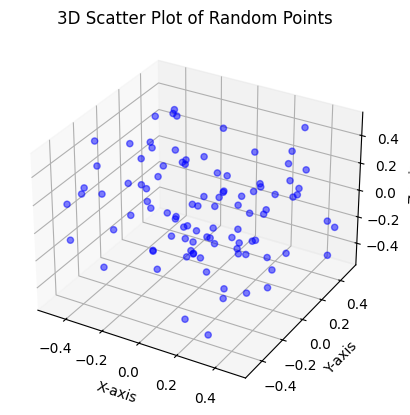

In [14]:
#Seeing how the initial state looks like
#ax = plt.figure().add_subplot(projection='3d')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extract x, y, and z coordinates
x = r_0[0].flatten()
y = r_0[1].flatten()
z = r_0[2].flatten()

# Plot the points
ax.scatter(x, y, z, c='b', marker='o', alpha=0.5)

# Set labels
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

# Set the title
ax.set_title('Initial state of the Argon ')

# Show the plot
#plt.show()